D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0. 1.], y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


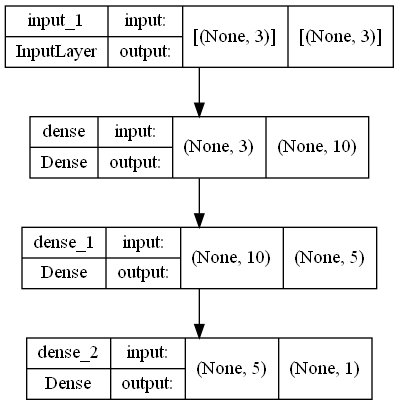

In [1]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 500
batchs = 64
splits = 0.2
lr        = 3e-4
input_dim = 3
opt = Adam(learning_rate=lr,decay=3e-4/200)

concatenated_df=pd.read_csv("oriP_extraFeatures_Att.csv")
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,2,3]]
Y = XY[:,[5]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="relu", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(5,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
# x = Dense(5,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train = y_train.flatten()
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(zip(np.unique(y_train),class_weights))

plot_model(model,to_file='FeaturesPlots/model.png',show_shapes=True)

In [2]:
history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights)

model.save_weights(r'weightANDlearningcurve/AttPModule_model_3layer.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

Epoch 1/500
10500/10500 [==============================] - 11s 995us/step - loss: 0.1231 - acc: 0.9068 - val_loss: 0.0829 - val_acc: 0.9017
Epoch 2/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0699 - acc: 0.9215 - val_loss: 0.0559 - val_acc: 0.9265
Epoch 3/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0626 - acc: 0.9374 - val_loss: 0.0470 - val_acc: 0.9424
Epoch 4/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0620 - acc: 0.9386 - val_loss: 0.0449 - val_acc: 0.9438
Epoch 5/500
10500/10500 [==============================] - 12s 1ms/step - loss: 0.0618 - acc: 0.9388 - val_loss: 0.0428 - val_acc: 0.9467
Epoch 6/500
10500/10500 [==============================] - 10s 999us/step - loss: 0.0618 - acc: 0.9392 - val_loss: 0.0489 - val_acc: 0.9400
Epoch 7/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0617 - acc: 0.9394 - val_loss: 0.0548 - val_acc: 0.9341
Epoch 8/500
10500/10500 [=====

Epoch 60/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9402 - val_loss: 0.0499 - val_acc: 0.9396
Epoch 61/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0616 - acc: 0.9403 - val_loss: 0.0501 - val_acc: 0.9395
Epoch 62/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9404 - val_loss: 0.0496 - val_acc: 0.9402
Epoch 63/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9402 - val_loss: 0.0455 - val_acc: 0.9440
Epoch 64/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9403 - val_loss: 0.0493 - val_acc: 0.9402
Epoch 65/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9402 - val_loss: 0.0481 - val_acc: 0.9415
Epoch 66/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9402 - val_loss: 0.0468 - val_acc: 0.9425
Epoch 67/500
10500/10500 [=

Epoch 119/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9403 - val_loss: 0.0486 - val_acc: 0.9412
Epoch 120/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9406 - val_loss: 0.0506 - val_acc: 0.9385
Epoch 121/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9402 - val_loss: 0.0458 - val_acc: 0.9435
Epoch 122/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9405 - val_loss: 0.0510 - val_acc: 0.9383
Epoch 123/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9404 - val_loss: 0.0519 - val_acc: 0.9379
Epoch 124/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9403 - val_loss: 0.0470 - val_acc: 0.9423
Epoch 125/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9406 - val_loss: 0.0538 - val_acc: 0.9356
Epoch 126/500
10500/

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9402 - val_loss: 0.0482 - val_acc: 0.9413
Epoch 178/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9403 - val_loss: 0.0450 - val_acc: 0.9444
Epoch 179/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9406 - val_loss: 0.0499 - val_acc: 0.9402
Epoch 180/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9405 - val_loss: 0.0491 - val_acc: 0.9404
Epoch 181/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0494 - val_acc: 0.9403
Epoch 182/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0615 - acc: 0.9404 - val_loss: 0.0492 - val_acc: 0.9404
Epoch 183/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9405 - val_loss: 0.0451 - val_acc: 0.9442
Epoch 184/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0482 - val_acc: 0.9416
Epoch 236/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0498 - val_acc: 0.9401
Epoch 237/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0519 - val_acc: 0.9380
Epoch 238/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0504 - val_acc: 0.9393
Epoch 239/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9405 - val_loss: 0.0492 - val_acc: 0.9404
Epoch 240/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9403 - val_loss: 0.0481 - val_acc: 0.9413
Epoch 241/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9405 - val_loss: 0.0499 - val_acc: 0.9395
Epoch 242/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9406 - val_loss: 0.0500 - val_acc: 0.9395
Epoch 294/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9406 - val_loss: 0.0516 - val_acc: 0.9381
Epoch 295/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9405 - val_loss: 0.0496 - val_acc: 0.9402
Epoch 296/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0497 - val_acc: 0.9403
Epoch 297/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0480 - val_acc: 0.9421
Epoch 298/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9405 - val_loss: 0.0472 - val_acc: 0.9423
Epoch 299/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9405 - val_loss: 0.0476 - val_acc: 0.9422
Epoch 300/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9403 - val_loss: 0.0477 - val_acc: 0.9421
Epoch 352/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0499 - val_acc: 0.9401
Epoch 353/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0475 - val_acc: 0.9422
Epoch 354/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9406 - val_loss: 0.0476 - val_acc: 0.9421
Epoch 355/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9406 - val_loss: 0.0491 - val_acc: 0.9404
Epoch 356/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9408 - val_loss: 0.0512 - val_acc: 0.9383
Epoch 357/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9405 - val_loss: 0.0502 - val_acc: 0.9395
Epoch 358/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0485 - val_acc: 0.9415
Epoch 410/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9406 - val_loss: 0.0491 - val_acc: 0.9405
Epoch 411/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0463 - val_acc: 0.9426
Epoch 412/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0485 - val_acc: 0.9406
Epoch 413/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9408 - val_loss: 0.0509 - val_acc: 0.9392
Epoch 414/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0486 - val_acc: 0.9406
Epoch 415/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0499 - val_acc: 0.9402
Epoch 416/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9406 - val_loss: 0.0491 - val_acc: 0.9405
Epoch 468/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0500 - val_acc: 0.9401
Epoch 469/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9404 - val_loss: 0.0468 - val_acc: 0.9425
Epoch 470/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0484 - val_acc: 0.9406
Epoch 471/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0492 - val_acc: 0.9404
Epoch 472/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9407 - val_loss: 0.0504 - val_acc: 0.9393
Epoch 473/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0614 - acc: 0.9406 - val_loss: 0.0503 - val_acc: 0.9393
Epoch 474/500
10500/10500 [=======

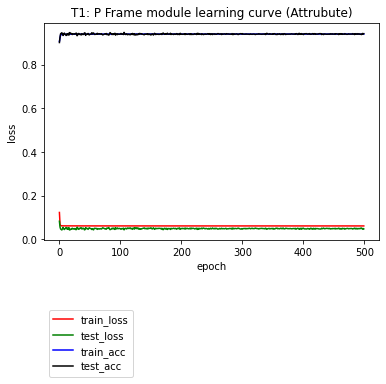

In [3]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('T1: P Frame module learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('weightANDlearningcurve/AttPModule_history.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)

In [4]:
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
a_weight3=model.get_weights()[4]
a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

print("\n\na_weight3: ")
for a in a_weight3:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias3: ")
for a in a_bias3:
        print(a,end=",")
        
# g_weight1=model.get_layer(index=0).get_weights()
# g_weight2=model.get_layer(index=1).get_weights()
        
# print(g_weight1)
# print(g_weight2)


a_weight1: 
0.4291034,-0.23295857,0.36669564,-0.045049254,-0.024056105,-0.19996627,-0.17127442,0.024635866,0.50597054,0.44927785,0.38621643,0.112291515,0.32880682,-0.023528408,0.0076013952,0.10381956,0.101832055,-0.024680715,0.37285993,0.36444953,1.0642877,-0.53199154,1.0247017,-0.057596084,-0.019306248,-0.55693465,-0.66452885,0.022688366,1.0016187,1.0253701,

a_bias1: 
-0.19747022,0.91097057,-0.18074825,-0.10435863,-0.019743368,0.8950057,0.9214476,-0.038140975,-0.18510309,-0.19101386,

a_weight2: 
1.0570565,-0.8487153,1.1375064,-1.1038606,0.97421604,-1.3607337,1.2666489,-1.5282203,1.3802817,-1.4362665,0.92836314,-0.818833,0.9781203,-0.84191716,0.91237605,-0.093660615,-0.022143506,0.02031693,0.04414743,0.013866953,0.022912553,-0.02064184,-0.0038916168,0.04253333,0.021138107,-1.4698274,1.2617399,-1.4801781,1.5499295,-1.2892922,-1.4864866,1.2747192,-1.6587557,1.4415206,-1.5304735,0.044541396,0.058768917,-0.035546526,0.008934654,-0.07485565,0.84449613,-0.79711777,0.8764807,-0.85627884,0.